In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import circlify

In [48]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/9_OneNumSevCatSubgroupOneObs.csv'
df = pd.read_csv(url)
df

,Country,TIME,Value
0,Australia,2000,17.2
1,Australia,2005,15.8
2,Australia,2010,14.0
3,Australia,2015,13.0
4,Austria,2000,23.1
...,...,...,...
105,United Kingdom,2015,17.1
106,United States,2000,23.1
107,United States,2005,19.0
108,United States,2010,18.8


# Grouped Barplot

In [48]:
countries = np.unique(df['Country'])
for i in range(len(df)):
    if len(df['TIME'][df['Country'] == df['Country'][i]]) < 4 : 
        df.drop(i,inplace=True)
    else:
        continue

In [53]:
df = df.sort_values(by = 'Value', ascending=False)

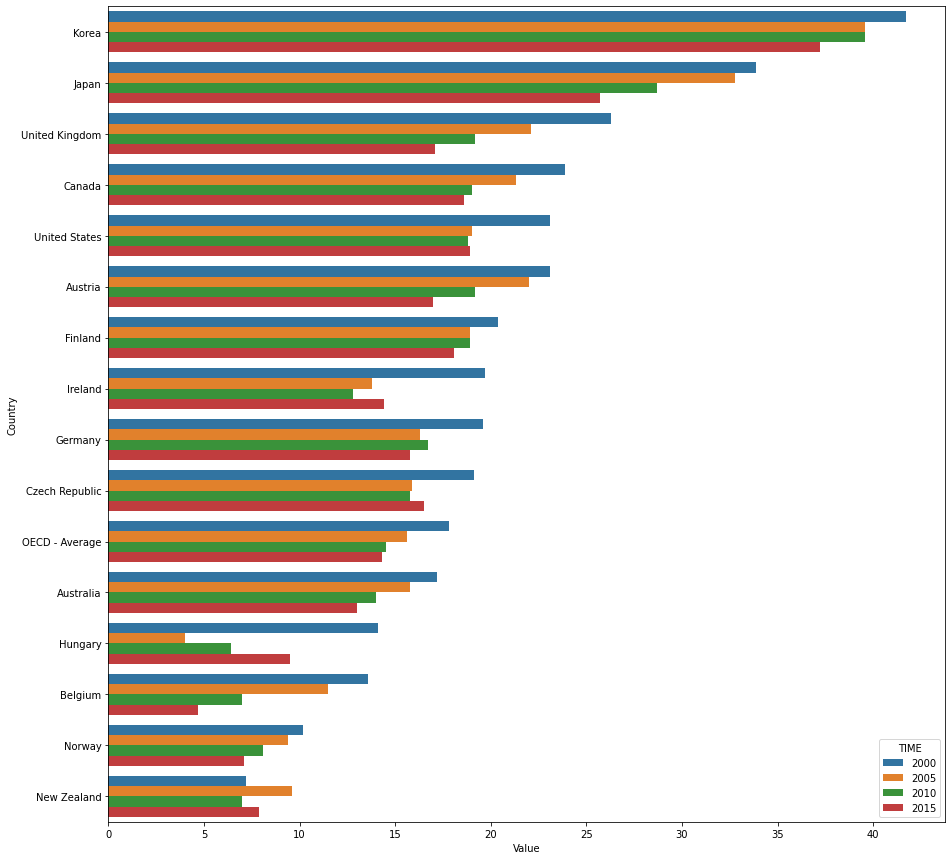

In [54]:
plt.figure(figsize = (15,15))
sns.barplot(data=df, x="Value", y="Country", hue="TIME")
plt.show()

In [64]:
df2 = df.sort_values(by = 'TIME')
df2

,Country,TIME,Value
62,Korea,2000,41.7
30,Finland,2000,20.4
42,Hungary,2000,14.1
81,OECD - Average,2000,17.8
4,Austria,2000,23.1
...,...,...,...
61,Japan,2015,25.7
38,Germany,2015,15.8
84,OECD - Average,2015,14.3
7,Austria,2015,17.0


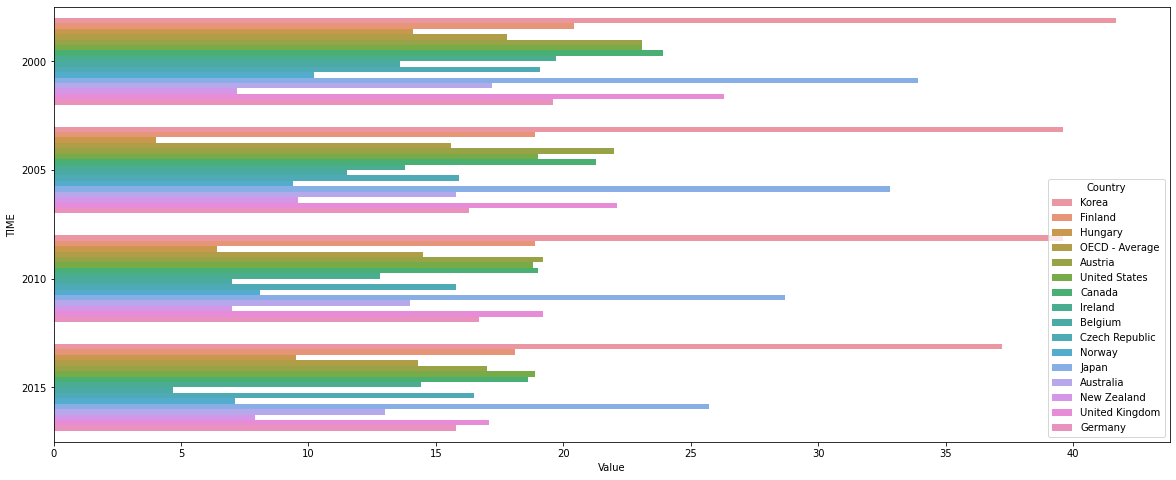

In [71]:
plt.figure(figsize = (20,8))
sns.barplot(data=df2, x="Value", y="TIME", hue="Country",orient='h')
plt.show()

# Parallel coordinates plot

In [49]:
df1 = df

In [50]:
a = []
countries = np.unique(df1['Country'])
for country in countries:
    if len(df1['TIME'][df1['Country'] == country]) != 4:
        a.append(np.where(df1['Country'] == country)[0])
b = []
for array in a:
    b.extend(array)


In [51]:
df1.drop(b,inplace=True,axis=0)

val1,val2,val3,val4 = [],[],[],[]
val1.append(df1['Value'][df1['TIME'] == 2000])
val2.append(df1['Value'][df1['TIME'] == 2005])
val3.append(df1['Value'][df1['TIME'] == 2010])
val4.append(df1['Value'][df1['TIME'] == 2015])

In [52]:
val1 = np.array(val1).flatten()
val2 = np.array(val2).flatten()
val3 = np.array(val3).flatten()
val4 = np.array(val4).flatten()

In [54]:
new_df = pd.DataFrame()
new_df['Country'] = df1['Country'].unique()
new_df['2000'] = val1
new_df['2005'] = val2
new_df['2010'] = val3
new_df['2015'] = val4

           Country
0        Australia
1          Austria
2          Belgium
3           Canada
4   Czech Republic
5          Finland
6          Germany
7          Hungary
8          Ireland
9            Japan
10           Korea
11     New Zealand
12          Norway
13  OECD - Average
14  United Kingdom
15   United States


,Country,2000,2005,2010,2015
0,Australia,17.2,15.8,14.0,13.0
1,Austria,23.1,22.0,19.2,17.0
2,Belgium,13.6,11.5,7.0,4.7
3,Canada,23.9,21.3,19.0,18.6
4,Czech Republic,19.1,15.9,15.8,16.5
5,Finland,20.4,18.9,18.9,18.1
6,Germany,19.6,16.3,16.7,15.8
7,Hungary,14.1,4.0,6.4,9.5
8,Ireland,19.7,13.8,12.8,14.4
9,Japan,33.9,32.8,28.7,25.7


In [60]:
new_df.drop(np.where(new_df['Country'] == 'OECD - Average')[0],inplace=True)

<AxesSubplot:xlabel='TIME', ylabel='Gender Age Gap'>

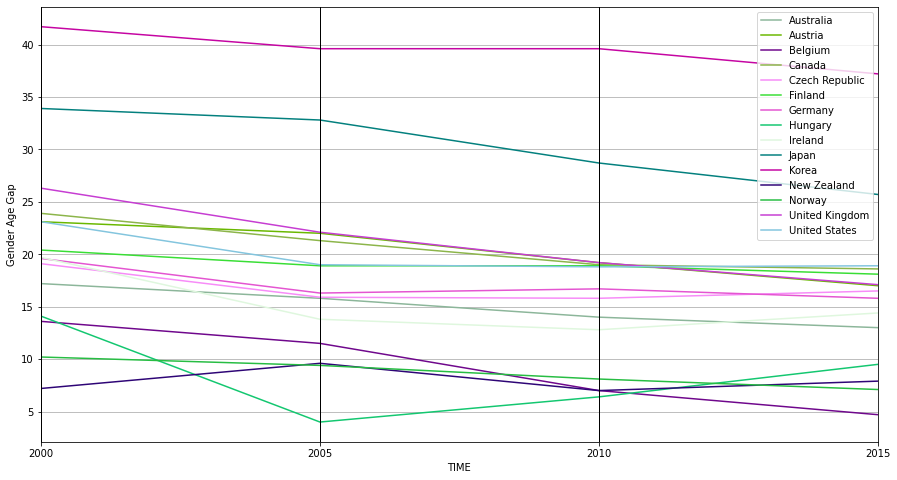

In [62]:
plt.figure(figsize = (15,8))
plt.xlabel('TIME')
plt.ylabel('Gender Age Gap')
pd.plotting.parallel_coordinates(
    new_df, 'Country')

# Slope Chart

In [261]:
years = [2000,2015]
new_df = df.loc[(df['Country'].isin(countries)) & (df['TIME'].isin(years))]
j = 0
new_df = new_df.reset_index()
new_df = new_df.drop('index',axis = 1)

In [262]:
a = []
for country in countries:
    if len(new_df['TIME'][new_df['Country'] == country]) != 2:
        a.append(np.where(new_df['Country'] == country)[0][0])
new_df.drop(a,inplace=True,axis=0)

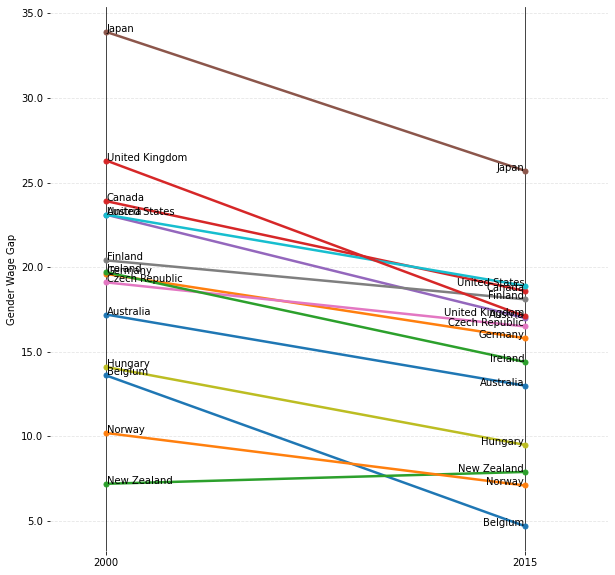

In [263]:
countries = new_df['Country'].unique()
countries = np.random.choice(countries, 15, replace=False)
countries = np.delete(countries, np.where(countries == 'OECD - Average'))
fig, ax = plt.subplots(1, figsize=(10,10))
for i, v in enumerate(countries):

    temp = new_df[new_df['Country'] == v]
    plt.plot(temp.TIME, temp.Value, 
              lw=2.5, 
             marker='o', markersize=5)

    plt.text(temp.TIME.values[0]+0.02, temp.Value.values[0], v)

    plt.text(temp.TIME.values[1]-0.02, temp.Value.values[1], v, ha='right')
    
plt.xlim(1998,2018)
plt.xticks([2000, 2015])
plt.ylabel('Gender Wage Gap')
yticks = plt.yticks()[0]
plt.yticks(yticks[1:-1], [i for i in yticks[1:-1]])
ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Scatter Plot

In [200]:
years = [2000,2015]
new_df = df.loc[(df['Country'].isin(countries)) & (df['TIME'].isin(years))]
j = 0
new_df = new_df.reset_index()
new_df = new_df.drop('index',axis = 1)

In [201]:
a = []
for country in countries:
    if len(new_df['TIME'][new_df['Country'] == country]) != 2:
        a.append(np.where(new_df['Country'] == country)[0][0])
new_df.drop(a,inplace=True,axis=0)


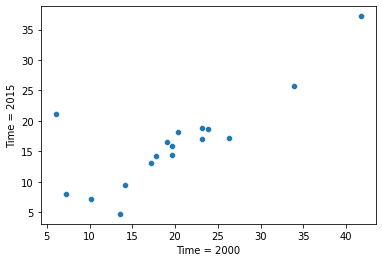

In [203]:
x = new_df['Value'][new_df['TIME'] == 2000].values
y = new_df['Value'][new_df['TIME'] == 2015].values
sns.scatterplot(x=x, y=y)
plt.xlabel('Time = 2000')
plt.ylabel('Time = 2015')
plt.show()